In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib

from mycolorpy import colorlist as mcp

from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

In [2]:
color1=mcp.gen_color(cmap="tab20c",n=11)
print(color1)

['#3182bd', '#9ecae1', '#e6550d', '#fdae6b', '#31a354', '#a1d99b', '#756bb1', '#bcbddc', '#636363', '#bdbdbd', '#d9d9d9']


In [3]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.f million' % (x * 1e-6)


formatter = FuncFormatter(millions)

In [4]:
absolute = pd.read_csv('../data/fig1_2005-2024_yearly_edits_contributors_new_data.csv')

In [5]:
# edit data
percentage_edits = pd.read_csv('../data/fig1_top10_corpos_percentage_edits_based_on_total_edits_newData.csv')
percentage_edits = percentage_edits.drop(columns={'Unnamed: 0'})

edits_tot = absolute.copy().rename(columns={'edits_CE': 'corporate', 'edits_total': 'total'})

edits_tot = edits_tot[['year', 'corporate', 'total']].copy().tail(9).head(8)

In [6]:
#contributor data
percentage_contributors = pd.read_csv('../data/fig1_top10_corpos_percentage_contributors_based_on_total_edits_newData.csv')
percentage_contributors = percentage_contributors.drop(columns={'Unnamed: 0'})

contributors_tot = absolute.copy().rename(columns={'contributors_CE': 'corporate', 'controbutors_total': 'total'})
contributors_tot = contributors_tot[['year', 'corporate', 'total']].copy().tail(9).head(8)

In [7]:
# function to add value labels
def addlabels(ax, x, y):
	for i in range(len(x)):
		ax.text(i, y[i] , y[i], ha = 'right')


In [8]:
unique_columns = set(list(percentage_contributors.keys()) + list(percentage_edits.keys()))

# Generate a custom colormap where each unique column gets a unique color
custom_colormap = {col: plt.cm.tab20c(i) for i, col in enumerate(unique_columns)}

In [9]:
rename_dict = {
    "adt": "Apple",
    "amap": "Amazon",
    "tomtom": "TomTom",
    "MSFTOpenMaps": "Microsoft",
    "grab": "Grab",
    "mapbox": "Mapbox",
    "expedia":"Expedia"
}

percentage_edits = percentage_edits.rename(
    columns=rename_dict
)
percentage_edits.sort_index(axis=1, inplace=True)


percentage_contributors = percentage_contributors.rename(
    columns=rename_dict
)
percentage_contributors.sort_index(axis=1, inplace=True)

display(percentage_edits)
display(percentage_contributors)

,Amazon,Apple,DigitalEgypt,Grab,Kaart,Mapbox,Meta,Microsoft,Other,TomTom,year
0,0.022400,0.000020,0.000000,0.000000,0.001177,0.001371,0.002988,0.000000,0.003649,0.000322,2016
1,0.119329,0.000816,0.000000,0.003488,0.796537,0.016846,0.222671,0.000000,0.016312,0.051132,2017
2,0.066776,0.000683,0.000000,0.084614,1.037736,0.002327,1.071272,0.000000,0.018795,0.004779,2018
3,0.114993,0.000234,0.000000,0.055557,3.390600,0.001008,1.810558,0.000000,0.154618,0.000000,2019
4,0.081942,4.656223,0.000000,0.092603,2.605729,0.024020,2.317568,0.278583,0.103196,0.000006,2020
5,1.335908,3.879330,0.091666,0.062213,1.632651,0.117985,3.258264,0.236811,0.112340,0.172950,2021
6,0.298259,1.315219,0.320635,0.136077,1.533141,0.086116,2.717010,0.147478,0.203826,0.272230,2022
7,0.177392,1.111021,0.263081,0.204196,0.877120,0.070711,0.993128,0.127317,0.102897,0.312308,2023


,Amazon,Apple,Expedia,Grab,Kaart,Mapbox,Meta,Microsoft,Other,TomTom,year
0,0.111703,0.000768,0.026486,0.000000,0.010748,0.031476,0.000384,0.000000,0.000000,0.003455,2016
1,0.285494,0.006596,0.058418,0.028267,0.015704,0.021043,0.007538,0.000000,0.001256,0.201008,2017
2,0.118461,0.008462,0.034497,0.048817,0.100562,0.007160,0.027663,0.000000,0.007485,0.000651,2018
3,0.146818,0.005674,0.001064,0.143626,0.158166,0.002128,0.043974,0.000000,0.019505,0.000000,2019
4,0.233560,0.366787,0.000000,0.038159,0.133228,0.035527,0.058225,0.015132,0.011513,0.000329,2020
5,0.727777,0.390390,0.002039,0.107366,0.119597,0.045529,0.057420,0.013930,0.026841,0.034656,2021
6,0.500125,0.219839,0.004235,0.077772,0.055826,0.056596,0.083932,0.013090,0.044276,0.105492,2022
7,0.406651,0.170278,0.004108,0.084766,0.031367,0.063108,0.055266,0.011203,0.037342,0.040702,2023


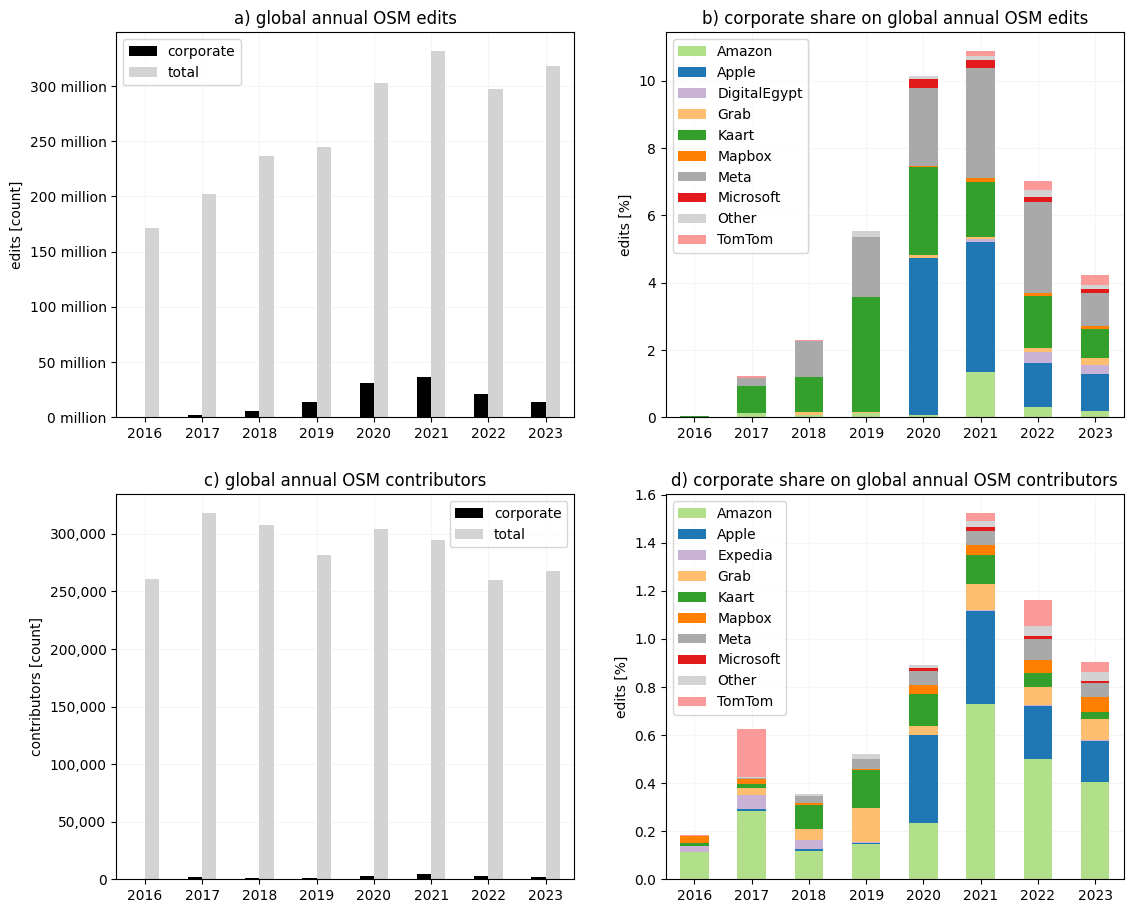

In [10]:
# creating a figure with 2 suplots
fig, axs = plt.subplots(2, 2, figsize=(13, 11))

custom_colormap = {
    'Meta': 'darkgrey',
    'Apple': '#1f78b4',
    'Amazon': '#b2df8a',
    'Kaart': '#33a02c',
    'TomTom': '#fb9a99',
    'Microsoft': '#e31a1c',
    'DigitalEgypt': '#cab2d6',
    'Grab': '#fdbf6f',
    'Mapbox': '#ff7f00',
    'Expedia': '#cab2d6',
    'Other': 'lightgrey',
}


bar_labels = ['corporate', 'total']
bar_colors = ['black', 'lightgrey']
ax1 = axs[0, 0]

edits_tot.plot.bar(
    x='year',
    label=bar_labels,
    color=bar_colors,
    ax=ax1,
    rot=0,
    xlabel=''
)
ax1.set_ylabel('edits [count]')
ax1.set_title('a) global annual OSM edits')
ax1.grid(color="whitesmoke")
ax1.yaxis.set_major_formatter(formatter)
ax1.set_axisbelow(True)


# the second subplot (right)
ax2 = axs[0, 1]
percentage_edits.plot.bar(
    x='year',
    stacked = True,
    color=[custom_colormap[col] for col in percentage_edits.loc[:, percentage_edits.columns != 'year']],
    ax=ax2,
    rot=0,
    xlabel=''
)
ax2.set_title('b) corporate share on global annual OSM edits')
ax2.set_ylabel('edits [%]')
ax2.grid(color="whitesmoke")
ax2.set_axisbelow(True)


ax3 = axs[1, 0]
contributors_tot.plot.bar(
    x='year',
    label=bar_labels,
    color=bar_colors,
    ax=ax3,
    rot=0,
    xlabel=''
)
ax3.set_ylabel('contributors [count]')
ax3.set_title('c) global annual OSM contributors')
ax3.grid(color="whitesmoke")
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax3.set_axisbelow(True)


# the second subplot (right)
ax4 = axs[1, 1]
percentage_contributors.plot.bar(
    x='year',
    stacked=True,
    color=[custom_colormap[col] for col in percentage_contributors.loc[:, percentage_contributors.columns != 'year']],
    ax=ax4,
    rot=0,
    xlabel=''
)

ax4.set_title('d) corporate share on global annual OSM contributors')
ax4.set_ylabel('edits [%]')
ax4.grid(color="whitesmoke")
ax4.set_axisbelow(True)



plt.savefig(
    "../figures/yearly_edits_andContributors_worldwide_and_corporate_share_combi_v2.png",
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white'
)
plt.show()